In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.algorithms import community as cm

### Introdução 

Uma das tarefas que é comum em análise de redes complexas é agrupar os vértices da rede em subconjuntos, chamados de comunidades, de modo que os vértices mais similares fiquem juntos em uma comunidade. 

A ideia central é entender um pouco sobre como os nós tendem a se organizar dentro da rede através da observação dos padrões de ligação que os mesmos possuem.

Problemas de detecção de comunidades são similares a problemas de partição em grafos, mas em geral nestes últimos já há uma quantidade pré-determinada de grupos e dos tamanhos dos mesmos no qual o grafo deve ser particionado, o que não ocorre em geral com os problemas de detecção de comunidades nos quais o tamanho e a quantidade de comunidades a serem detectadas não são previamente conhecidos

### Modularidade

Modularidade equivale ao coeficiente de assortatividade não normalizado para atributos categóricos, sendo que aqui os atributos categóricos identificam as comunidades
aos quais os nós pertencem.

- **nx.karate_club_graph()** 

Returns Zachary's Karate Club graph.

Each node in the returned graph has a node attribute 'club' that indicates the name of the club to which the member represented by that node belongs, either 'Mr. Hi' or 'Officer'. 

Each edge has a weight based on the number of contexts in which that edge's incident node members interacted.

- **louvain_communities()**: 

Find the best partition of a graph using the Louvain Community Detection Algorithm.

Louvain Community Detection Algorithm is a simple method to extract the community structure of a network. 
This is a heuristic method based on modularity optimization.

The algorithm works in 2 steps. 
On the first step it assigns every node to be in its own community and then for each node it tries to find the maximum positive modularity gain by moving each node to all of its neighbor communities. 
If no positive gain is achieved the node remains in its original community.

- **nx.community.greedy_modularity_communities(G)** 

Find communities in G using greedy modularity maximization.

This function uses Clauset-Newman-Moore greedy modularity maximization to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum). 

- **nx.modularity()**

Returns the modularity of the given partition of the graph.

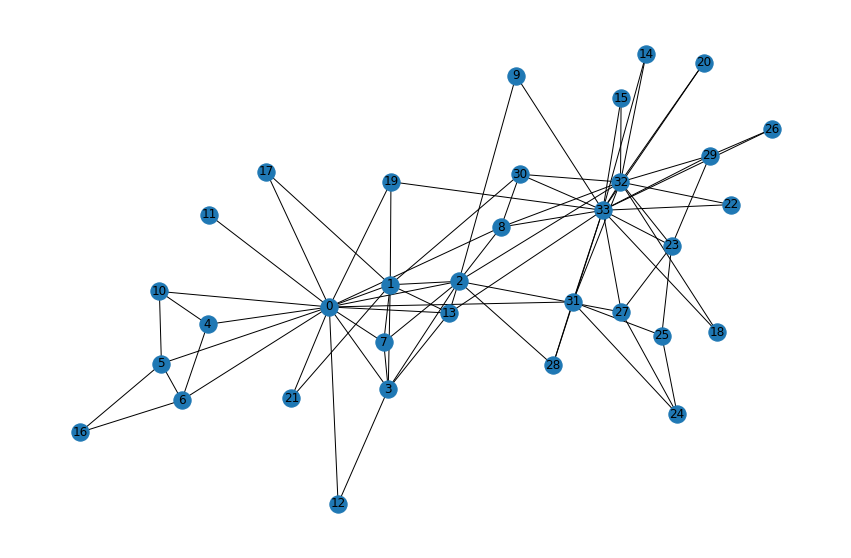

In [3]:
# Exemplo

G = nx.karate_club_graph()

fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(G,with_labels=True)

In [4]:
# Exemplo

comm = nx.community.louvain_communities(G, seed=123)
for it in comm:
    print(sorted(it))

[1, 2, 3, 7, 12, 13]
[0, 4, 5, 6, 10, 11, 16, 17, 19, 21]
[23, 24, 25, 27, 28, 31]
[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]


In [5]:
# Exemplo

c = nx.community.greedy_modularity_communities(G)
for it in c:
    print(sorted(it))

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


In [6]:
comsl = cm.louvain_communities(G)
comsc = cm.greedy_modularity_communities(G)

print('Modularidade - Louvain: {:.3f}'.format(cm.modularity(G,comsl)))
print('Modularidade - CNM    : {:.3f}'.format(cm.modularity(G,comsc)))

Modularidade - Louvain: 0.444
Modularidade - CNM    : 0.411


**Exemplo**

Utilize os algoritmos no exemplo dos personagens do segundo livro da saga de Harry Potter.

In [7]:
atri = pd.read_csv('../data/harrypotter/hpattributes.txt', sep='\t')
ares = pd.read_csv('../data/harrypotter/hpbook2.txt', sep=' ', header=None)
nome = pd.read_csv('../data/harrypotter/hpnames.txt', sep='\t')

In [8]:
# criando a rede

gpotter = nx.DiGraph()

n = atri.shape[0]

for k in range(n):
    gpotter.add_node(k,
                     nome = nome['name'][k],
                     ano = atri['schoolyear'][k],
                     gen = atri['gender'][k],
                     casa = atri['house'][k])

for k in range(n):
    for m in range(n):
        if ares.values[k][m] == 1:
            gpotter.add_edge(k,m)

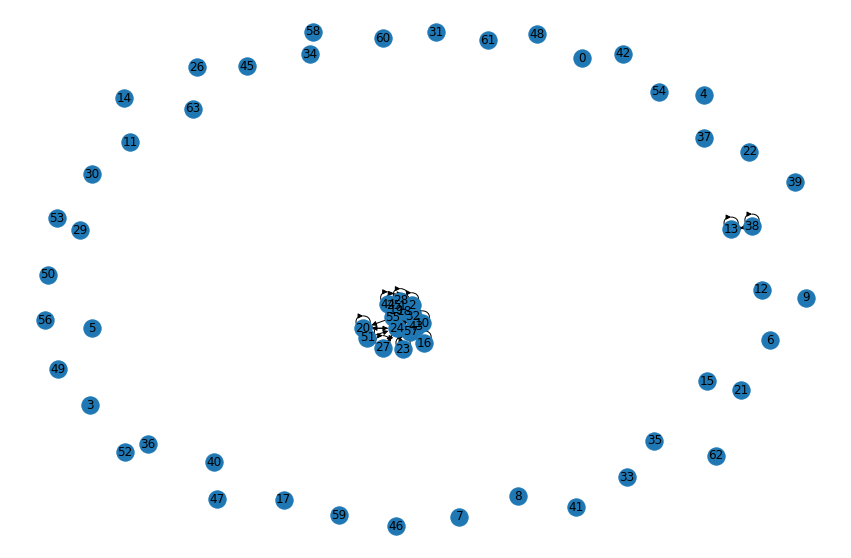

In [9]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(gpotter,with_labels=True)

In [10]:
comsl = cm.louvain_communities(gpotter)
comsc = cm.greedy_modularity_communities(gpotter, cutoff=len(comsl))

print('Modularidade - Louvain: {:.3f}'.format(cm.modularity(gpotter,comsl)))
print('Modularidade - CNM    : {:.3f}'.format(cm.modularity(gpotter,comsc)))

Modularidade - Louvain: 0.371
Modularidade - CNM    : 0.371


In [11]:
# matriz de adjacencia esparsa
A = nx.adjacency_matrix(gpotter)

# apagando os nos isolados
isolados = []
for k in range(n):
    if np.sum(A[[k],:]) == 0:
        isolados.append(k)
        gpotter.remove_node(k)

print(len(isolados), 'nos isolados.')

44 nos isolados.


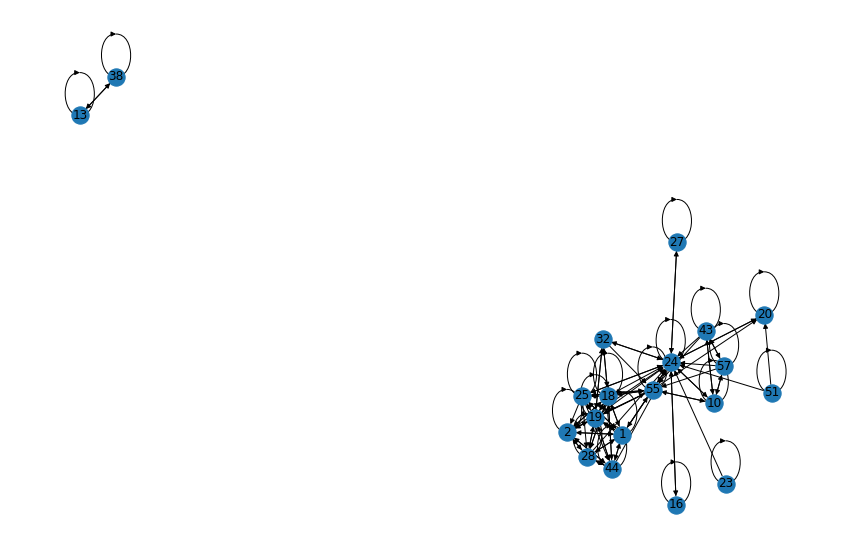

In [12]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(gpotter,with_labels=True)

Para comparar os resultados, no algoritmo de **Clauset-Newman-Moore** só salvamos o mesmo número de comunidades que as devolvidas pelo algoritmo de **Louvain**. 

In [13]:
comsl = cm.louvain_communities(gpotter)
comsc = cm.greedy_modularity_communities(gpotter,cutoff=len(comsl))

print('Modularidade - Louvain: {:.3f}'.format(cm.modularity(gpotter,comsl)))
print('Modularidade - CNM    : {:.3f}'.format(cm.modularity(gpotter,comsc)))

Modularidade - Louvain: 0.371
Modularidade - CNM    : 0.371


In [14]:
plt.close('all')

pos = nx.circular_layout(gpotter)

coresp = {0:'lightskyblue',
          1:'steelblue',
          2:'gray',
          3:'pink',
          4:'magenta',
          5:'violet',
          6: 'mediumorchid'}

coresl = []
for no in gpotter.nodes():
    for k in range(len(comsl)):
        if no in comsl[k]:
            coresl.append(coresp[k])
            break

coresc = []
for no in gpotter.nodes():
    for k in range(len(comsc)):
        if no in comsc[k]:
            coresc.append(coresp[k])
            break
    
etiquetas = nx.get_node_attributes(gpotter, 'nome')

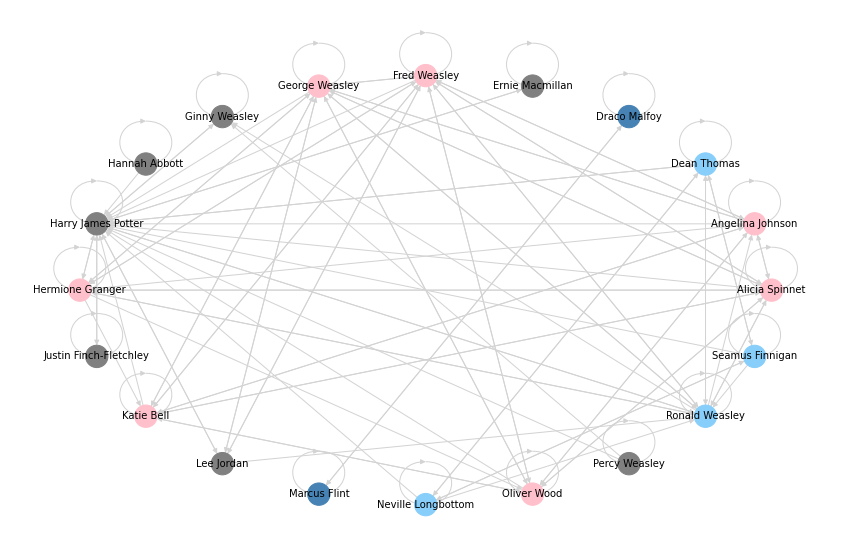

In [15]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw_networkx(gpotter,
                 pos=pos,
                 edge_color='lightgray',
                 node_size = 500,
                 labels=etiquetas,
                 font_size=10, 
                 node_color=coresl)

plt.box(False)
plt.show()

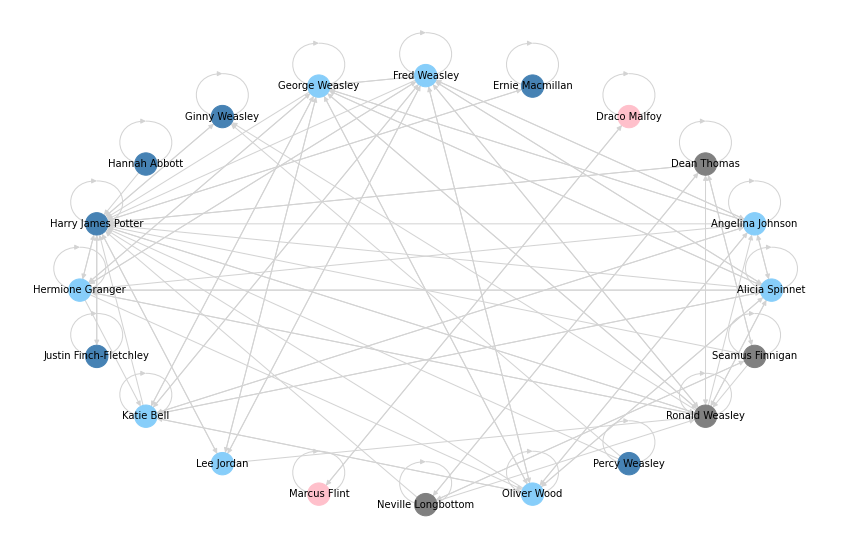

In [16]:
#plt.figure()

fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw_networkx(gpotter,
                 pos=pos,
                 edge_color='lightgray',
                 node_size = 500,
                 labels=etiquetas,
                 font_size=10, 
                 node_color=coresc)

plt.box(False)
plt.show()

In [17]:
df = pd.read_csv('../data/stack_network/stack_network_links.csv')

In [18]:
df.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [19]:
G = nx.Graph()

In [20]:
with open('../data/stack_network/stack_network_links.csv') as f:
  next(f)
  G = nx.parse_edgelist(f.readlines(), comments='/', delimiter=',', data=(('weight', float),))

In [21]:
list(G.nodes())[:5]

['azure', '.net', 'sql-server', 'asp.net', 'entity-framework']

In [22]:
list(G.edges.data('weight'))[:5]

[('azure', '.net', 20.933192346640457),
 ('azure', 'amazon-web-services', 21.30994959394633),
 ('azure', 'asp.net', 23.764072995058054),
 ('azure', 'asp.net-web-api', 21.585694763313093),
 ('azure', 'c#', 22.14448701181891)]

In [23]:
communities = cm.greedy_modularity_communities(G, weight='weight')

In [24]:
len(communities)

14

In [25]:
for it in communities:
    print(it)

frozenset({'photoshop', 'ajax', 'html', 'xml', 'codeigniter', 'less', 'twitter-bootstrap-3', 'twitter-bootstrap', 'css', 'jquery', 'laravel', 'vue.js', 'ionic-framework', 'html5', 'php', 'wordpress', 'javascript', 'json', 'angularjs', 'bootstrap', 'drupal', 'mysql', 'sass'})
frozenset({'vb.net', 'asp.net-web-api', 'xamarin', 'mvc', 'asp.net', 'wpf', 'wcf', 'sql-server', 'unity3d', 'c#', '.net', 'sql', 'plsql', 'azure', 'visual-studio', 'linq', 'oracle', 'entity-framework'})
frozenset({'java', 'api', 'eclipse', 'spring-boot', 'android-studio', 'spring-mvc', 'web-services', 'maven', 'hibernate', 'java-ee', 'spring', 'jsp', 'android', 'rest'})
frozenset({'powershell', 'ubuntu', 'linux', 'git', 'apache', 'bash', 'unix', 'github', 'nginx', 'shell', 'windows'})
frozenset({'ruby', 'postgresql', 'express', 'redux', 'ruby-on-rails', 'elasticsearch', 'reactjs', 'mongodb', 'redis', 'node.js', 'react-native'})
frozenset({'qt', 'matlab', 'django', 'python', 'flask', 'machine-learning', 'c++', 'r', 

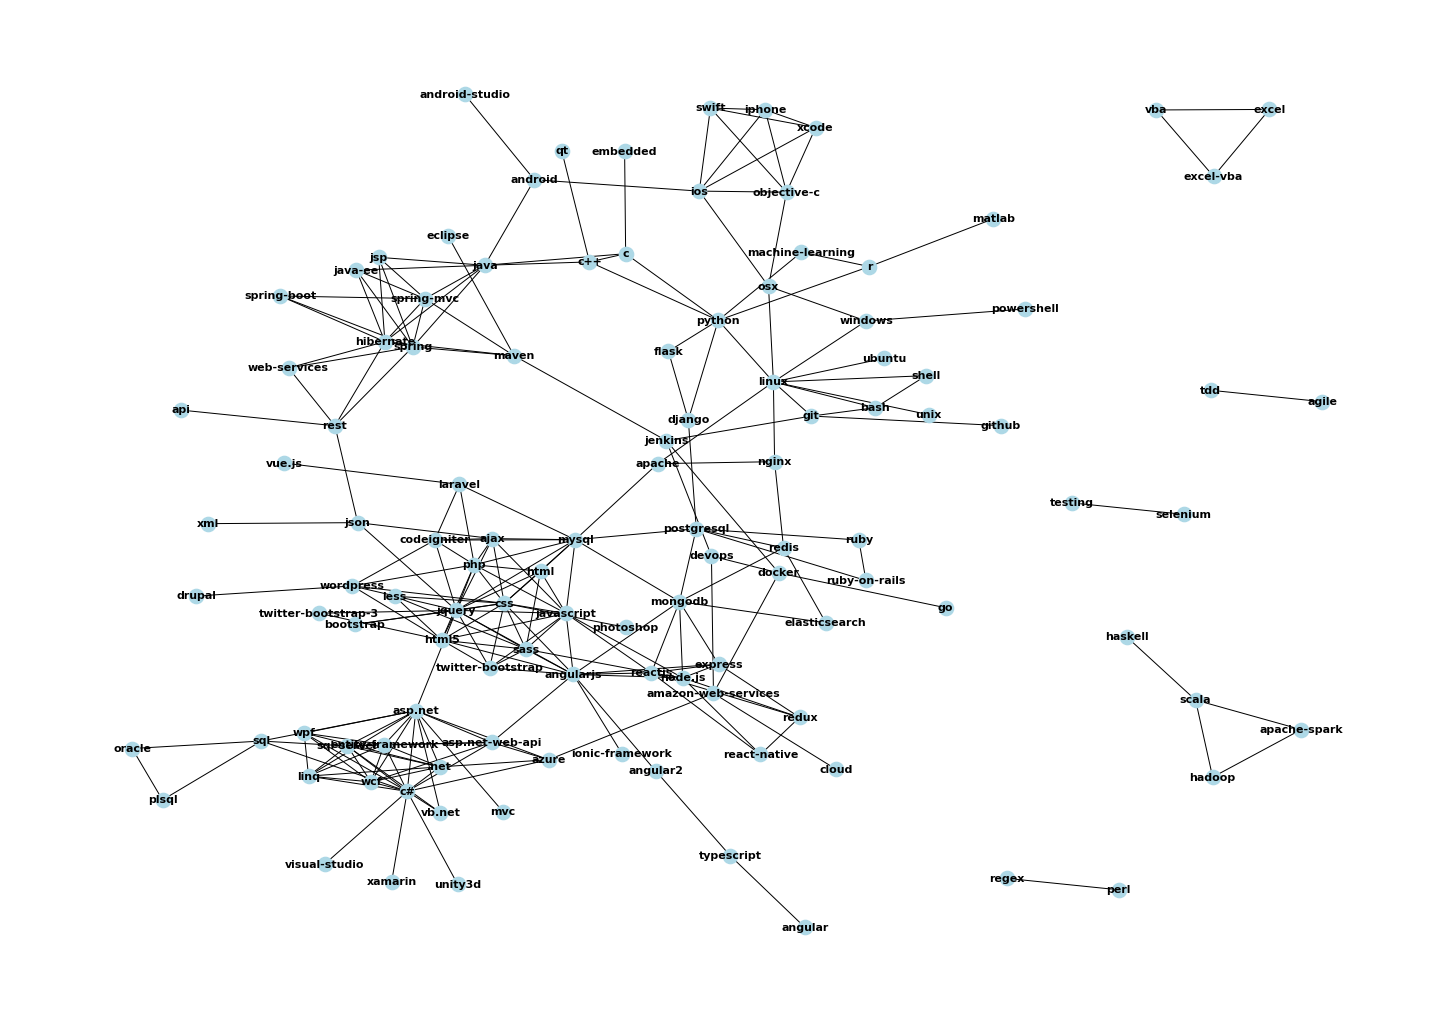

In [54]:
import pygraphviz

plt.figure(figsize=(20,14))

nx.draw(G, pos = nx.nx_agraph.graphviz_layout(G), \
    node_size=200, node_color='lightblue', linewidths=1.5, \
    font_size=11, font_weight='bold', with_labels=True)

In [55]:
communities_dict = {}

for i in range(len(communities)):
  for node in list(communities[i]):
    communities_dict[node] = i

nx.set_node_attributes(G, communities_dict, name='group')

In [63]:
for key, value in communities_dict.items():
    print(key, value, end=", ")

photoshop 0, ajax 0, html 0, xml 0, codeigniter 0, less 0, twitter-bootstrap-3 0, twitter-bootstrap 0, css 0, jquery 0, laravel 0, vue.js 0, ionic-framework 0, html5 0, php 0, wordpress 0, javascript 0, json 0, angularjs 0, bootstrap 0, drupal 0, mysql 0, sass 0, vb.net 1, asp.net-web-api 1, xamarin 1, mvc 1, asp.net 1, wpf 1, wcf 1, sql-server 1, unity3d 1, c# 1, .net 1, sql 1, plsql 1, azure 1, visual-studio 1, linq 1, oracle 1, entity-framework 1, java 2, api 2, eclipse 2, spring-boot 2, android-studio 2, spring-mvc 2, web-services 2, maven 2, hibernate 2, java-ee 2, spring 2, jsp 2, android 2, rest 2, powershell 3, ubuntu 3, linux 3, git 3, apache 3, bash 3, unix 3, github 3, nginx 3, shell 3, windows 3, ruby 4, postgresql 4, express 4, redux 4, ruby-on-rails 4, elasticsearch 4, reactjs 4, mongodb 4, redis 4, node.js 4, react-native 4, qt 5, matlab 5, django 5, python 5, flask 5, machine-learning 5, c++ 5, r 5, embedded 5, c 5, amazon-web-services 6, cloud 6, docker 6, go 6, devops

In [61]:
len(communities_dict)

115

In [56]:
from pyvis.network import Network

net = Network(notebook=True, cdn_resources='in_line')
_ = net.from_nx(G)
_ = net.show('communities.html')

communities.html
